In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./.gitattributes
./Language-identification-LLM.ipynb
./README.md
./test.csv
./train.csv
./valid.csv
./.git\config
./.git\description
./.git\HEAD
./.git\index
./.git\packed-refs
./.git\hooks\applypatch-msg.sample
./.git\hooks\commit-msg.sample
./.git\hooks\fsmonitor-watchman.sample
./.git\hooks\post-checkout
./.git\hooks\post-commit
./.git\hooks\post-merge
./.git\hooks\post-update.sample
./.git\hooks\pre-applypatch.sample
./.git\hooks\pre-commit.sample
./.git\hooks\pre-merge-commit.sample
./.git\hooks\pre-push
./.git\hooks\pre-push.sample
./.git\hooks\pre-rebase.sample
./.git\hooks\pre-receive.sample
./.git\hooks\prepare-commit-msg.sample
./.git\hooks\push-to-checkout.sample
./.git\hooks\sendemail-validate.sample
./.git\hooks\update.sample
./.git\info\exclude
./.git\lfs\objects\f1\80\f180d78a1f0e758fd33bb1bae37f62eebc538d78ece2affb3d05a967850ba474
./.git\logs\HEAD
./.git\logs\refs\heads\main
./.git\logs\refs\remotes\origin\HEAD
./.git\objects\09\e6a70d1aadc53ed29b9890332f184f89d0a39b
./

In [3]:
!nvidia-smi

Sat Sep  7 13:24:05 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.44                 Driver Version: 552.44         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   40C    P8             13W /  170W |     879MiB /  12288MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import urllib.request
import seaborn as sns
import plotly
import plotly.express as px
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report, make_scorer, fbeta_score
from sklearn.model_selection import train_test_split,cross_val_score, RepeatedStratifiedKFold
import torch
from wordcloud import WordCloud

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
data_file = "./test.csv"
try:
    df = pd.read_csv(data_file, encoding='utf-8')
except UnicodeDecodeError: # read the data with encoding since there are special or latin characters 
    try:
        df = pd.read_csv(data_file, encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv(data_file, encoding='ISO-8859-1')
df.head()

,labels,text
0,nl,Een man zingt en speelt gitaar.
1,nl,De technologisch geplaatste Nasdaq Composite I...
2,es,Es muy resistente la parte trasera rígida y lo...
3,it,"""In tanti modi diversi, l'abilità artistica de..."
4,ar,منحدر يواجه العديد من النقاشات المتجهه إزاء ال...


In [6]:
df.shape

(10000, 2)

In [7]:
df.columns

Index(['labels', 'text'], dtype='object')

In [8]:
df.isnull().sum()

labels    0
text      0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(667)

In [10]:
df[df.duplicated()]

,labels,text
329,ru,"Почти 100 000 человек в день приходят сюда, чт..."
724,ar,للسفر من خلال رابطة التجارة ورحلات المغامرات ل...
799,vi,Từ trên cao bạn sẽ có thể thấy rằng Sarawak tự...
855,bg,"удовлетворение от нещата, които чух"
932,ar,أداء أكثر من 6500 طالب من K-12 ، في المؤتمرات ...
...,...,...
9938,ur,لیکن 15 اغواکاروں میں سے 2 سیاحوں کے طور پر دا...
9943,sw,Ushirika wa majina ya pesa na uzito mwingine n...
9945,th,สำหรับการเดินทางของ Atta ที่ไปที่สาธารณรัฐเช็ก...
9955,ar,لذلك أنا فعلا غير متأكد لماذا.


In [12]:
df = df.drop_duplicates(keep = 'first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9333 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  9333 non-null   object
 1   text    9333 non-null   object
dtypes: object(2)
memory usage: 218.7+ KB


In [13]:
df['labels'].value_counts()

labels
es    500
zh    500
ja    500
fr    500
de    500
en    500
nl    484
it    484
pt    484
pl    481
ar    440
ru    440
th    440
vi    440
tr    440
el    440
ur    440
bg    440
hi    440
sw    440
Name: count, dtype: int64

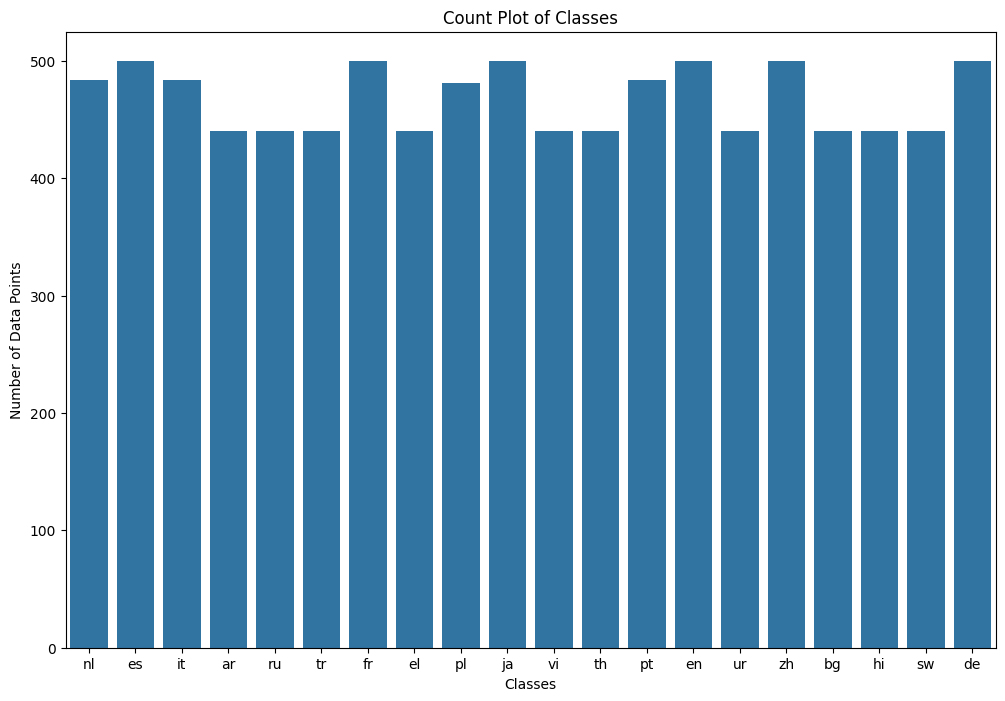

In [14]:
plt.figure(figsize=(12, 8))
fg = sns.countplot(data = df, x="labels")
fg.set_title("Count Plot of Classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of Data Points")
plt.show()

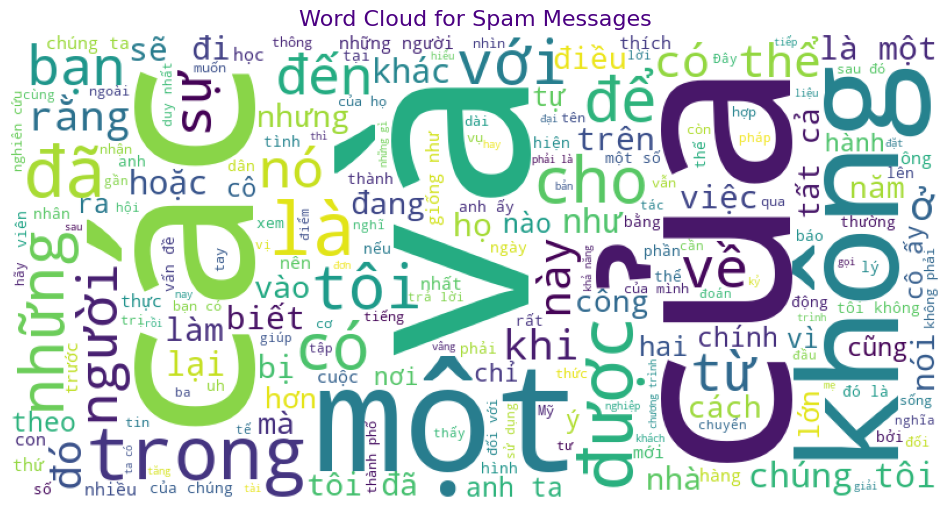

In [16]:
# Filter vài từ việt nam 
spam_texts = ' '.join(df[df['labels'] == "vi"]['text'])
# Generate a word cloud
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_texts)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud for Spam Messages', fontsize=16, color='#4B0082')
plt.show()